<a href="https://colab.research.google.com/github/hayeon727/2021_summer_SWtest_python/blob/main/2021_summer_%EC%BD%94%ED%85%8C%ED%8A%B9%EA%B0%95_3%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

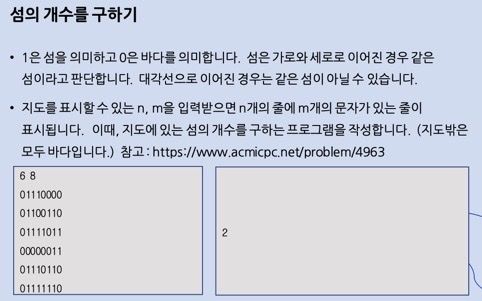

In [ ]:
# 섬의 개수 구하기

In [ ]:
def dfs(mapk, visit, y, x):
    visit[y][x] = True
    n = len(mapk)
    m = len(mapk[0])
    dxy = ( (0, 1), (1, 0), (0, -1), (-1, 0) )
    for k in dxy:
        ny = y + k[0]
        nx = x + k[1]
        if nx < 0 or nx >= m or ny < 0 or ny >= n: continue
        if mapk[ny][nx] == 0: continue
        dfs(mapk, visit, ny, nx)

def bfs(mapk, visit, y, x):     # 큐 자료구조
    # q = [ ]
    # q.append((y, x))
    q = [ (y, x) ]
    n = len(mapk)
    m = len(mapk[0])
    dxy = ( (0, 1), (1, 0), (0, -1), (-1, 0) )
    while not len(q) == 0:
        u = q.pop(0)
        visit[u[0]][u[1]] = True
        for k in dxy:
            ny = u[0] + k[0]
            nx = u[1] + k
            if nx < 0 or nx >= m or ny < 0 or ny >= n: continue
            if mapk[ny][nx] == 0: continue
            q.append((ny, nx))

n, m = map(int, input().split())
mapk = [ ]
for i in range(n):  # 한줄을 한 리스트로 추가. n번 반복(세로만큼)
    line = [ ]
    s = input()
    for k in s:
        if k == '1': line.append(1)
        else: line.append(0)
    mapk.append(line)

visit = [ [False]*m for _ in range(n) ]

island = 0

for y in range(n):
    for x in range(m):
        if visit[y][x] == False and mapk[y][k] == 1:
            island += 1
            dfs(mapk, visit, y, x)
            #bfs(mapk, visit, y, x)

print(island)

6 8
01110000
01100110
01111011
00000011
01110110
01111110


TypeError: ignored

In [ ]:
mapk

[[0, 1, 1, 1, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 1, 1, 0],
 [0, 1, 1, 1, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 0]]

In [ ]:
# teacher's solution

def dfs(mapk, visit, y, x):
    visit[y][x] = True
    n = len(mapk)
    m = len(mapk[0])
    dxy = ( (0, 1), (1, 0), (0, -1), (-1, 0) )
    for k in dxy:
        ny = y + k[0]
        nx = x + k[1]
        if nx < 0 or nx >= m or ny < 0 or ny >= n: continue
        if visit[ny][nx] == True or mapk[ny][nx] == 0: continue
        dfs(mapk, visit, ny, nx)

def bfs(mapk, visit, y, x):
    q = [ (y, x) ]
    n = len(mapk)
    m = len(mapk[0])
    dxy = ( (0, 1), (1, 0), (0, -1), (-1, 0) )
    while not len(q) == 0:
        u = q.pop(0)
        visit[u[0]][u[1]] = True
        for k in dxy:
            ny = u[0] + k[0]
            nx = u[1] + k[1]
            if nx < 0 or nx >= m or ny < 0 or ny >= n: continue
            if visit[ny][nx] == True or mapk[ny][nx] == 0: continue
            q.append((ny, nx))        

n, m = map(int, input().split())
mapk = [ ]
for i in range(n):
    line = [ ]
    s = input()
    for k in s:
        if k == '1': line.append(1)
        else: line.append(0)
    mapk.append(line)

visit = [ [ False ]*m for _ in range(n) ]

island = 0

for y in range(n):
    for x in range(m):
        if visit[y][x] == False and mapk[y][x] == 1:
            island += 1
            dfs(mapk, visit, y, x)

print(island)

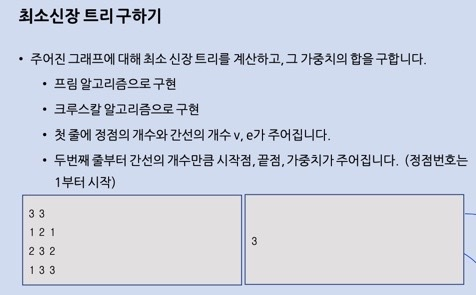

In [ ]:
# 최소 신장 트리 구하기 - 프림 알고리즘

In [28]:
from heapq import heappush, heappop
Inf = 1000000000    # 10억정도면 무한대.

vn, en = map(int, input().split())
E = [ ]
for _ in range(en):     # edge개수만큼 for
    f, t, w = map(int, input().split())
    E[f-1].append( (w, t-1) )
    E[t-1].append( (w, f-1) )

visited = [ False ]*vn      # 모두 다 방문하지 않았다.
d = [ Inf ]*vn
d[0] = 0
pq = [ (0, 0) ]       # 첫번째 방문할 정점은 아무거나 선택해도 됨.

sum = 0
while len(pq) != 0:
    u = heappop(pq)        # heapq 모듈 사용 / 첫번째 원소를 가져옴
    if visited[u[1]]: continue
    sum += u[0]
    visited[u[1]] = True
    for e in E:
        #if e[1] != u[1]: continue
        if visited[e[1]]: continue
        if d[e[1]] > e[0]:
            d[e[1]] = e[0]
            heappush(pq, (e[0], e[1]))

print(sum)

3 3
1 2 1


IndexError: ignored

In [ ]:
22 E

[(1, 1, 2), (2, 2, 3), (3, 1, 3)]

In [ ]:
# teacher's solution
from heapq import heappush, heappop

Inf = 100000000
vn, en = map(int, input().split())
E = [ [] for _ in range(vn) ]
for _ in range(en):
    f, t, w = map(int, input().split())
    E[f-1].append( (w, t-1) )
    E[t-1].append( (w, f-1) )

visited = [ False ]*vn
d = [ Inf ]*vn
d[0] = 0
pq = [ (0, 0) ]

sum = 0
while len(pq) != 0:
    u = heappop(pq)
    if visited[u[1]]: continue
    print(u)
    sum += u[0]
    visited[u[1]] = True
    for e in E[u[1]]:
        if visited[e[1]]: continue
        if d[e[1]] > e[0]:
            d[e[1]] = e[0]
            heappush(pq, (e[0], e[1]))

print(sum)

In [29]:
# 최소 신장 구하기 - 프루스칼 알고리즘

In [36]:
from heapq import heappush, heappop

def getRoot(S, k):
    if S[k] == k: return k
    S[k] = getRoot(S, S[k])
    return S[k]

inf = 100000000
vn, en = map(int, input().split())
E = [ ]
for _ in range(en):
    f, t, w = map(int, input().split())
    E.append( (w, f-1, t-1) )

S = [ i for i in range(vn) ]
E.sort()    # 정렬 사용

sum = 0
while e in E:
    u, v = e[1], e[2]
    ur, uv = getRoot(S, u), getRoot(S, v)
    if ur == vr: continue
    S[vr] = ur
    sum += e[0]

print(sum)

3 3
1 2 1
2 3 2
1 3 3


KeyboardInterrupt: ignored

In [34]:
# teacher's solution
from heapq import heappush, heappop

def getRoot(S, k):
    if S[k] == k: return k
    S[k] = getRoot(S, S[k])
    return S[k]

Inf = 100000000
vn, en = map(int, input().split())
E = [ ]
for _ in range(en):
    f, t, w = map(int, input().split())
    E.append( (w, f-1, t-1) )

S = [ i for i in range(vn) ]
E.sort()

sum = 0
for e in E:
    u, v = e[1], e[2]
    ur, vr = getRoot(S, u), getRoot(S, v)
    if ur == vr: continue
    S[vr] = ur
    sum += e[0]

print(sum)

3 3
1 2 1
2 3 2
1 3 3
3
